In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [14]:
# Course Link: https://rhyme.com/run/2KT9ED

# Load dataset

In [32]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [33]:
print("Shape of X_train:",x_train.shape)
print("Shape of Y_train:",y_train.shape)
print("Shape of X_test:",x_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (60000, 28, 28)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


## Data Visualization

Label of this picture: 3


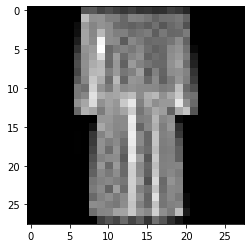

In [34]:
index = random.randint(1, x_train.shape[0])
plt.imshow(x_train[index], cmap='gray')
print("Label of this picture:",y_train[index])

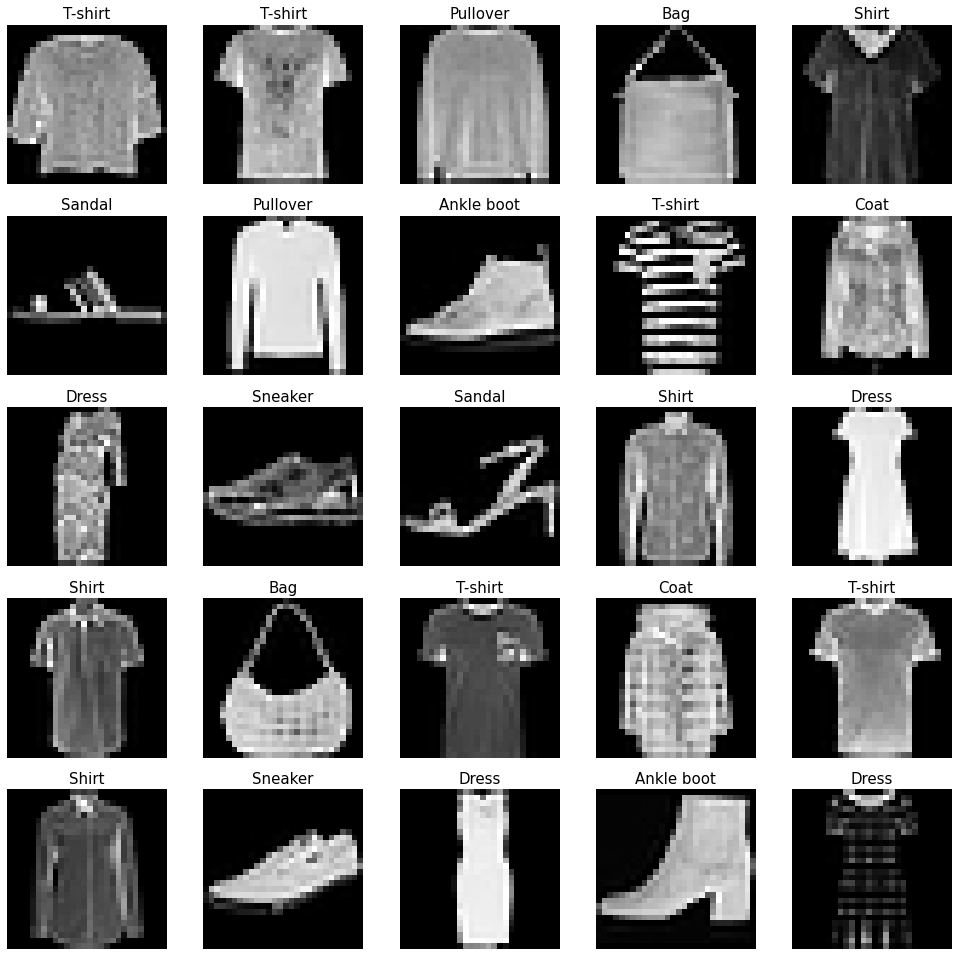

In [35]:
x_axis = 5
y_axis = 5

classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
          'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(x_axis, y_axis, figsize=(17, 17))
axes = axes.ravel() # Flatten the 15 x 15 matrix into 225 array

m = x_train.shape[0]

for i in range(25):
    index = np.random.randint(1, m)
    axes[i].imshow(x_train[index], cmap='gray')
    axes[i].set_title(classes[y_train[index]], fontsize=15)
    axes[i].axis('off')

## Data Preprocessing

#### Normalize Dataset 

In [36]:
print("Before Normalize\n")
print(x_train[0], "\n\n")

x_train = x_train / 255.
x_test = x_test / 255.

print("After Normalize\n")
print(x_train[0])

Before Normalize

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

#### Adding Noise to dataset

In [59]:
noise_factor = 0.3

noise_train_dataset = []

for img in x_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1) # Keep the values between 0 & 1
    noise_train_dataset.append(noisy_image)
    
noise_train_dataset = np.array(noise_train_dataset)

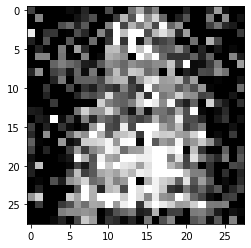

In [60]:
plt.imshow(noise_train_dataset[22], cmap='gray')

In [61]:
noise_test_dataset = []

for img in x_test:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1) # Keep the values between 0 & 1
    noise_test_dataset.append(noisy_image)
    
noise_test_dataset = np.array(noise_test_dataset)

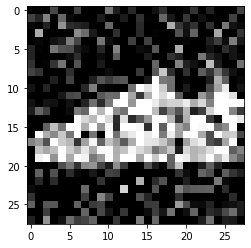

In [62]:
plt.imshow(noise_test_dataset[22], cmap='gray')

## Build and Train AutoEncoder Deep learning model

#### Convolutional layers

In [63]:
autoencoder = tf.keras.models.Sequential()

#Encoders 
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same', input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same'))

#Decoders
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding='same'))



In [64]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


#### Run the autoencoder

In [65]:
autoencoder.fit(noise_train_dataset.reshape(-1,28,28,1),
                x_train.reshape(-1,28,28,1),
                epochs = 10,
                batch_size=200, 
                validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1))
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3962 - val_loss: 0.3230
Epoch 2/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3145 - val_loss: 0.3124
Epoch 3/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3076 - val_loss: 0.3078
Epoch 4/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3046 - val_loss: 0.3061
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3034 - val_loss: 0.3053
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3026 - val_loss: 0.3044
Epoch 7/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3017 - val_loss: 0.3036
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3011 - val_loss: 0.3031
Epoch 9/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3006 - val_

## Evaluate and Predict the AutoEncoder

#### Evaluation

In [71]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1))
print("Test Accuracy: {:.1f}%".format(100-evaluation*100))

10000/10000 [==============================] - 1s 55us/sample - loss: 0.3023
Test Accuracy: 69.8%


#### Prediction

In [72]:
prediction = autoencoder.predict(noise_test_dataset[:10].reshape(-1, 28, 28, 1))

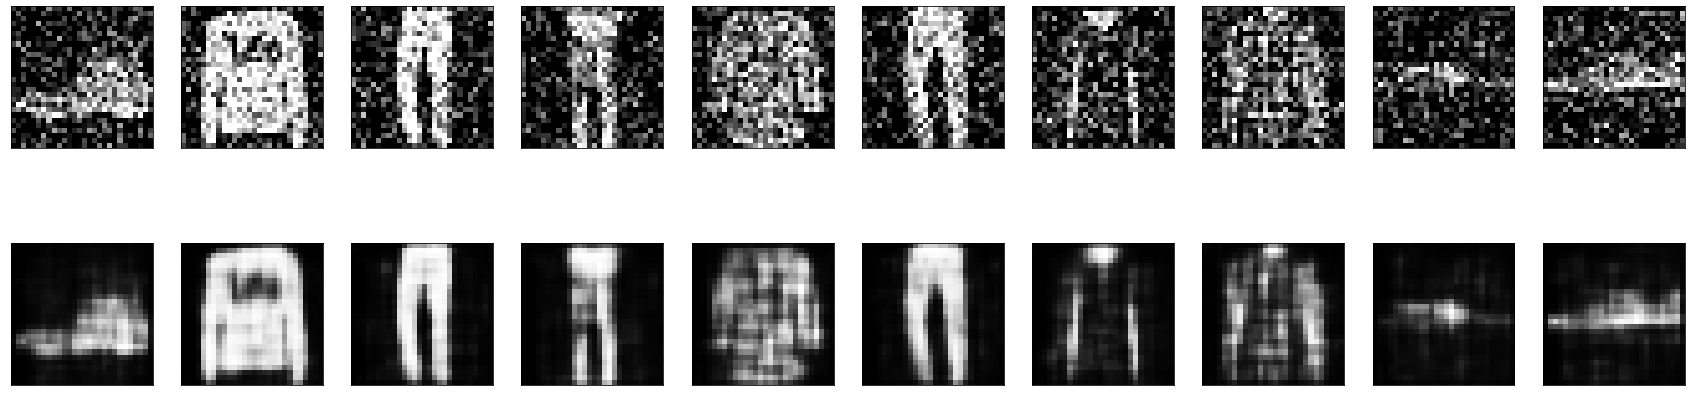

In [75]:
fig, axes = fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(30, 8))

for images, row in zip([noise_test_dataset[:10], prediction], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape(28,28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)